## Hierarchical clustering

This chapter will help you answer the last question from chapter 1 - how do you find groups of similar observations (clusters) in your data using the distances that you have calculated? You will learn about the fundamental principles of hierarchical clustering - the linkage criteria and the dendrogram plot - and how both are used to build clusters. You will also explore data from a wholesale distributor in order to perform market segmentation of clients using their spending habits.

### Calculating linkage
Let us revisit the example with three players on a field. The distance matrix between these three players is shown below and is available as the variable dist_players.

From this we can tell that the first group that forms is between players 1 & 2, since they are the closest to one another with a Euclidean distance value of 11.

Now you want to apply the three linkage methods you have learned to determine what the distance of this group is to player 3.

In [1]:
# players
x1 = c(5,15, 0)
y1 = c(4,10, 20)
players <- data.frame(x1,y1)

# Calculate the Distance Between two_players
dist_players <- dist(players)

# Extract the pair distances
distance_1_2 <- dist_players[1]
distance_1_3 <- dist_players[2]
distance_2_3 <- dist_players[3]

# Calculate the complete distance between group 1-2 and 3
complete <- max(c(distance_1_3, distance_2_3))
complete

# Calculate the single distance between group 1-2 and 3
single <- min(c(distance_1_3, distance_2_3))
single

# Calculate the average distance between group 1-2 and 3
average <- mean(c(distance_1_3, distance_2_3))
average

[1] 18.02776

[1] 16.76305

[1] 17.39541

### Assign cluster membership
In this exercise you will leverage the hclust() function to calculate the iterative linkage steps and you will use the cutree() function to extract the cluster assignments for the desired number (k) of clusters.

You are given the positions of 12 players at the start of a 6v6 soccer match. This is stored in the lineup data frame.

You know that this match has two teams (k = 2), let's use the clustering methods you learned to assign which team each player belongs in based on their position.

Notes:

1. The linkage method can be passed via the method parameter: hclust(distance_matrix, method = "complete")

2. Remember that in soccer opposing teams start on their half of the field.

3. Because these positions are measured using the same scale we do not need to re-scale our data.

In [8]:
library(dplyr)

lineup <- readRDS("lineup.rds")

# Calculate the Distance
dist_players <- dist(lineup)

# Perform the hierarchical clustering using the complete linkage
hc_players <- hclust(dist_players, "complete")

# Calculate the assignment vector with a k of 2
clusters_k2 <- cutree(hc_players, k = 2)

# Create a new data frame storing these results
lineup_k2_complete <- lineup %>% 
    mutate(lineup, cluster = clusters_k2)

lineup_k2_complete

x,y,cluster
-1,1,1
-2,-3,1
8,6,2
7,-8,2
-12,8,1
-15,0,1
-13,-10,1
15,16,2
21,2,2
12,-15,2


### Exploring the clusters
Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

In this exercise you will explore that data frame you created in the previous exercise lineup_k2_complete.

Reminder: The lineup_k2_complete data frame contains the x & y positions of 12 players at the start of a 6v6 soccer game to which you have added clustering assignments based on the following parameters:

1. Distance: Euclidean
2. Number of Clusters (k): 2
3. Linkage Method: Complete

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

cluster,n
1,6
2,6


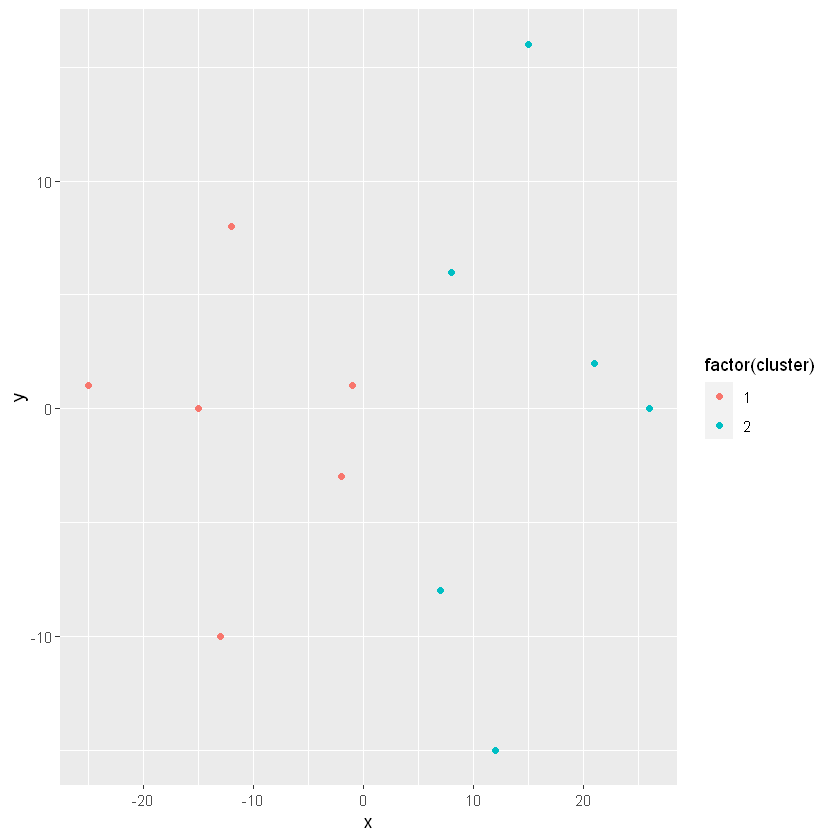

In [10]:
library(ggplot2)
# Count the cluster assignments
count(lineup_k2_complete, cluster)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_k2_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### Comparing average, single & complete linkage
You are now ready to analyze the clustering results of the lineup dataset using the dendrogram plot. This will give you a new perspective on the effect the decision of the linkage method has on your resulting cluster analysis.

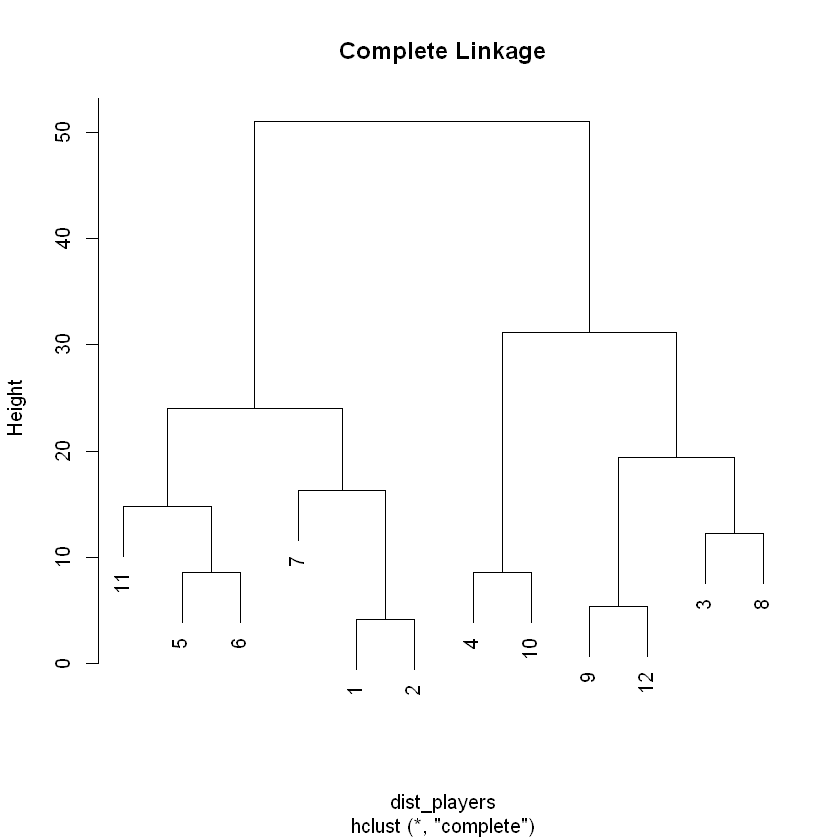

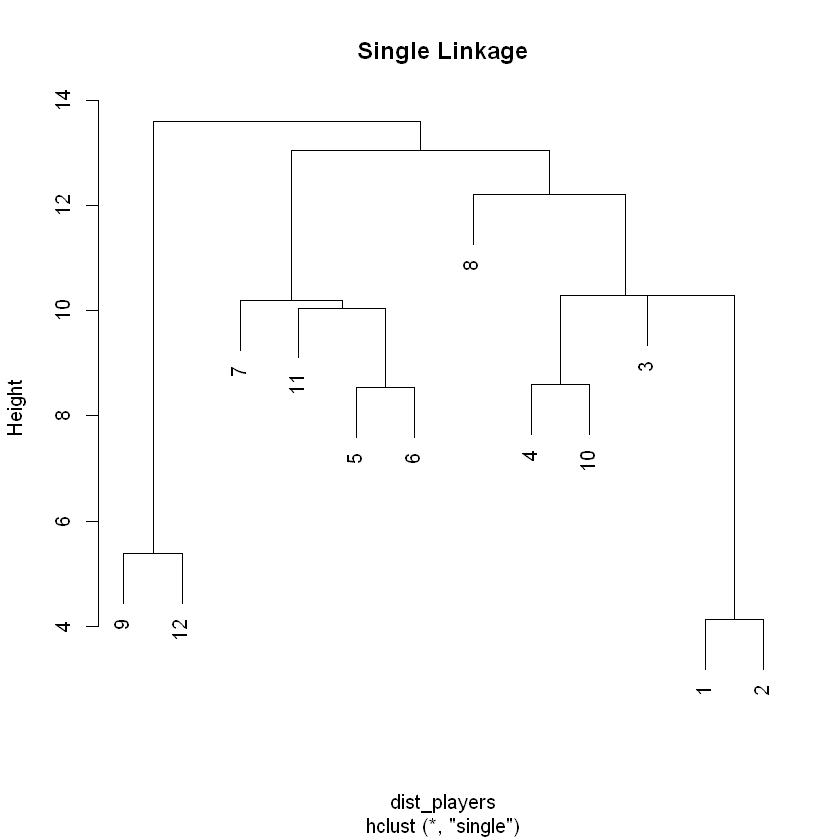

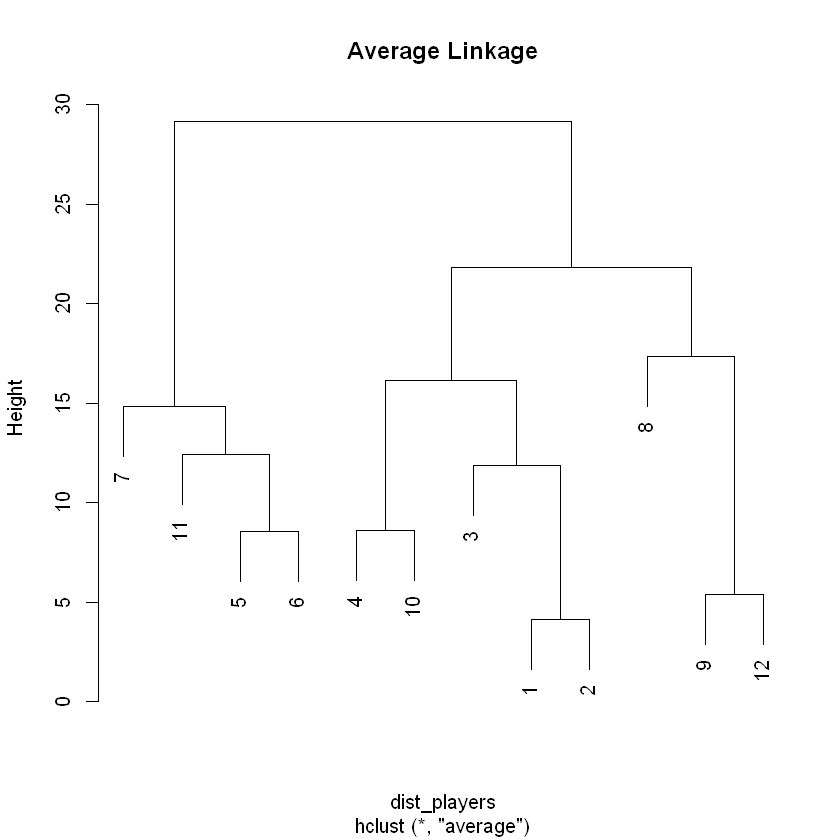

In [13]:
# Prepare the Distance Matrix
dist_players <- dist(lineup)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, "complete")
hc_single <-  hclust(dist_players, "single")
hc_average <- hclust(dist_players, "average")

# Plot & Label the 3 Dendrograms
# par(mfrow = c(x,x))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

### Clusters based on height
In previous exercises you have grouped your observations into clusters using a pre-defined number of clusters (k). In this exercise you will leverage the visual representation of the dendrogram in order to group your observations into clusters using a maximum height (h), below which clusters form.

You will work the color_branches() function from the dendextend library in order to visually inspect the clusters that form at any height along the dendrogram.

The hc_players has been carried over from your previous work with the soccer line-up data.

package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\RtmpoBXsK5\downloaded_packages


Warning message:
"package 'dendextend' was built under R version 3.6.3"
---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



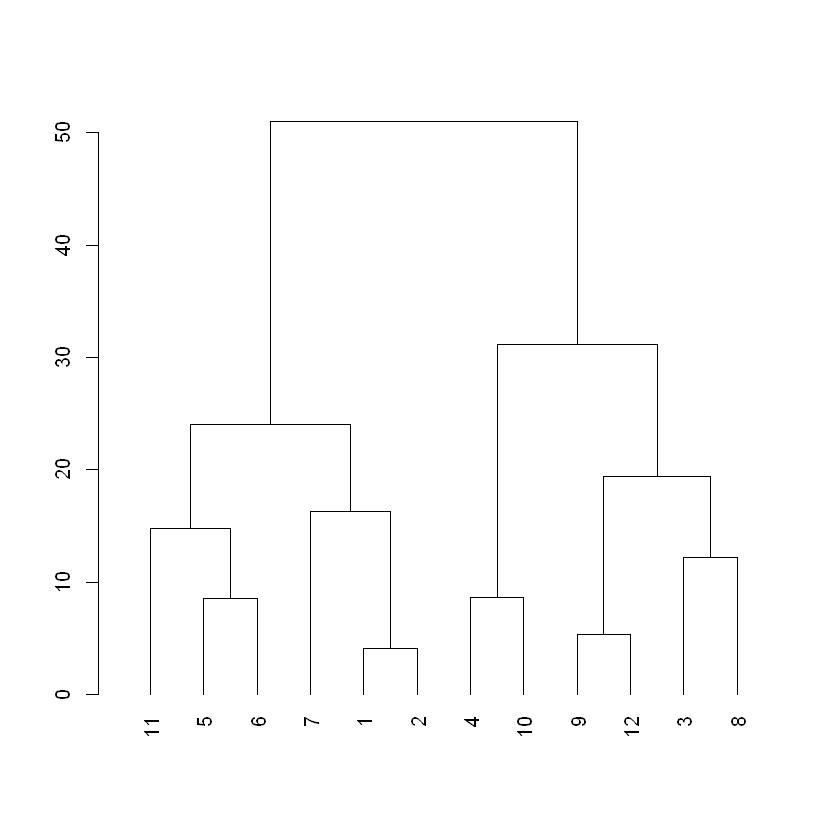

In [15]:
# install.packages("dendextend")
library(dendextend)
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)

# Plot the dendrogram
plot(dend_players)

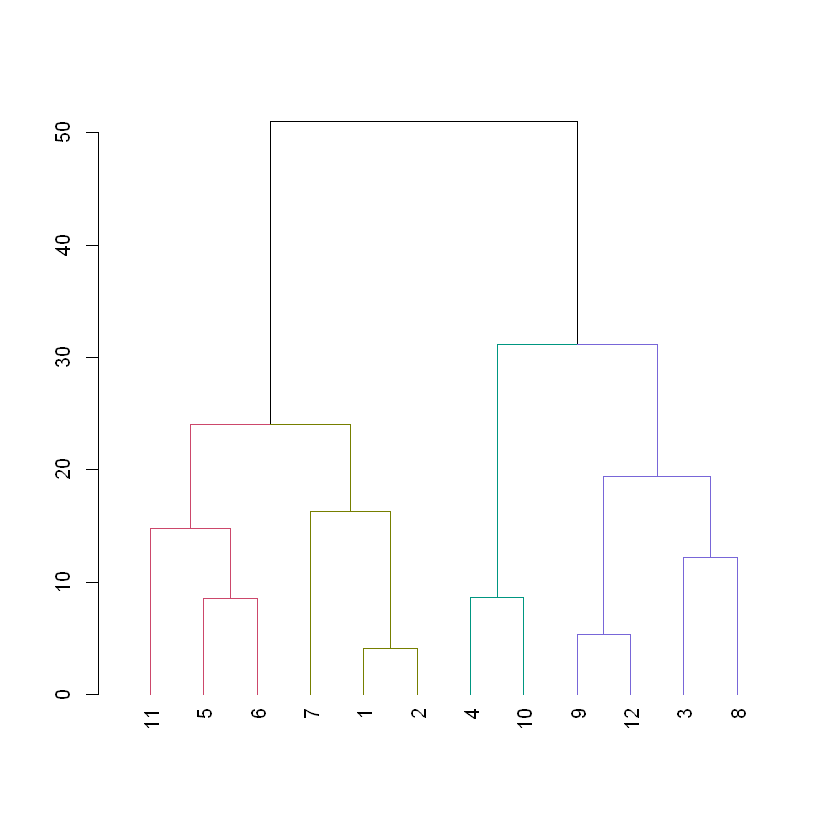

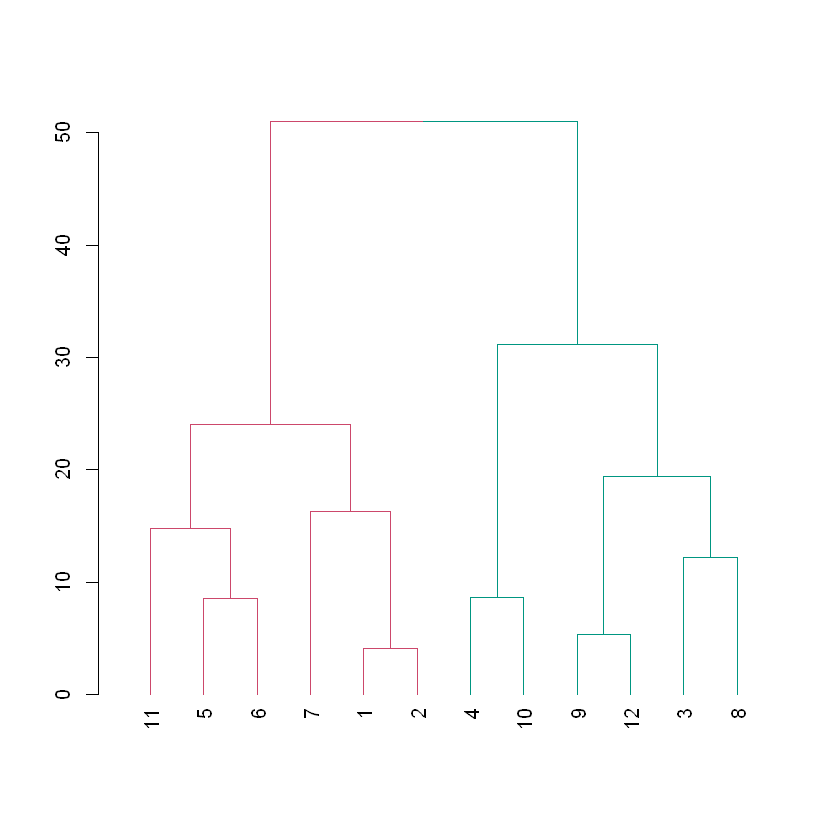

In [16]:
# Color branches by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20) 


# Color branches by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h = 40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)

### Exploring the branches cut from the tree
The cutree() function you used in exercises 5 & 6 can also be used to cut a tree at a given height by using the h parameter. Take a moment to explore the clusters you have generated from the previous exercises based on the heights 20 & 40.

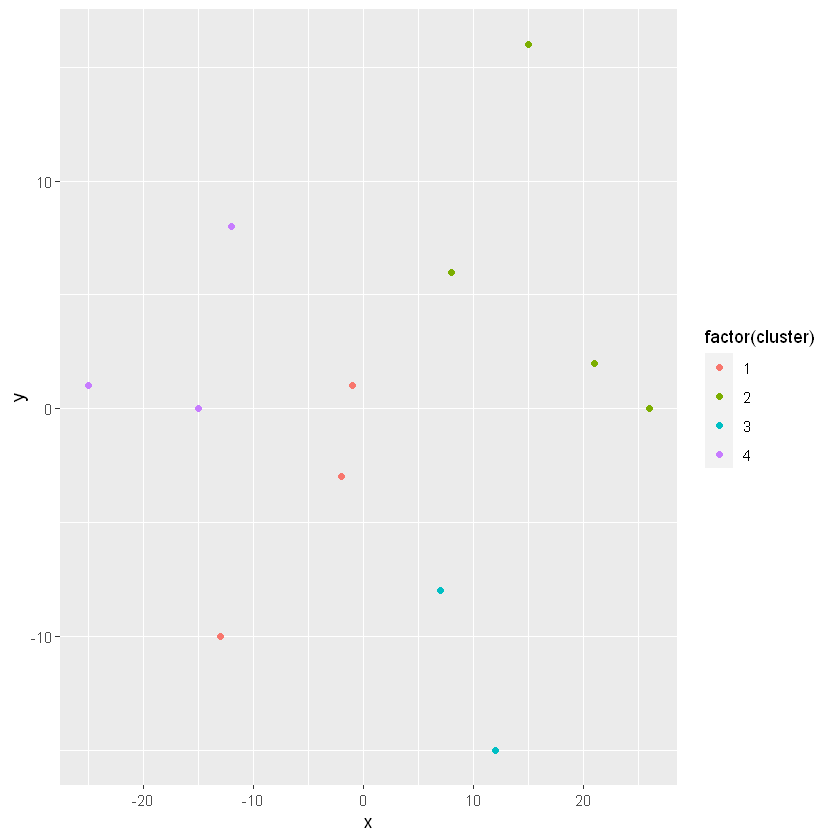

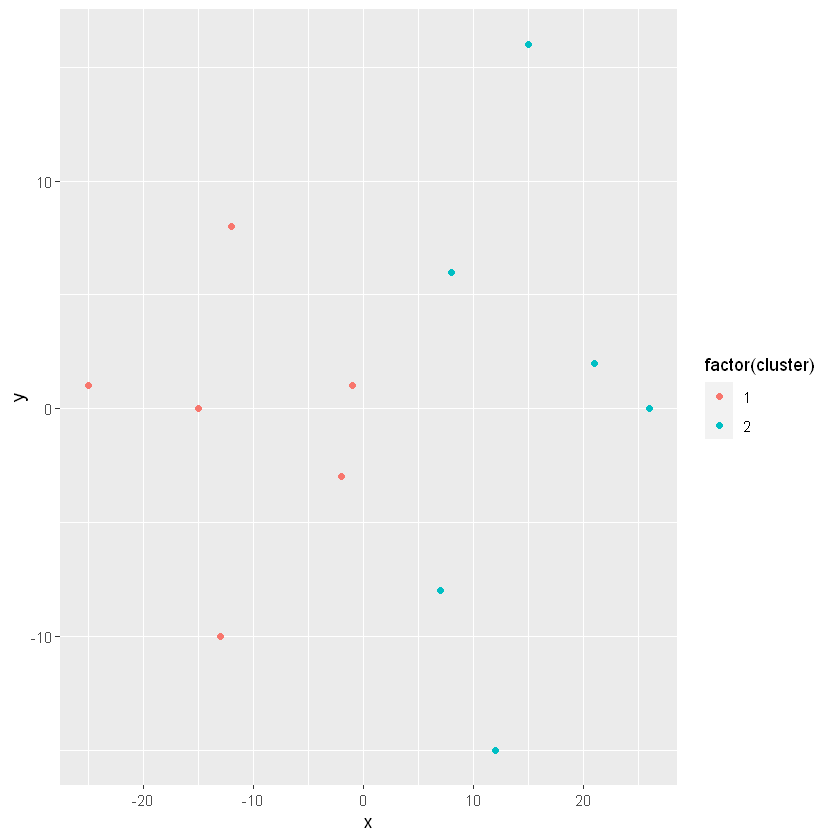

In [17]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a h of 20
clusters_h20 <- cutree(hc_players, h = 20)

# Create a new data frame storing these results
lineup_h20_complete <- mutate(lineup, cluster = clusters_h20)

# Calculate the assignment vector with a h of 40
clusters_h40 <- cutree(hc_players, h = 40)

# Create a new data frame storing these results
lineup_h40_complete <- mutate(lineup, cluster = clusters_h40)

# Plot the positions of the players and color them using their cluster for height = 20
ggplot(lineup_h20_complete, aes(x =x, y = y, color = factor(cluster))) +
  geom_point()

# Plot the positions of the players and color them using their cluster for height = 40
ggplot(lineup_h40_complete, aes(x =x, y = y, color = factor(cluster))) +
  geom_point()


### Segment wholesale customers
You're now ready to use hierarchical clustering to perform market segmentation (i.e. use consumer characteristics to group them into subgroups).

In this exercise you are provided with the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the data frame customers_spend. Assign these clients into meaningful clusters.

Note: For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

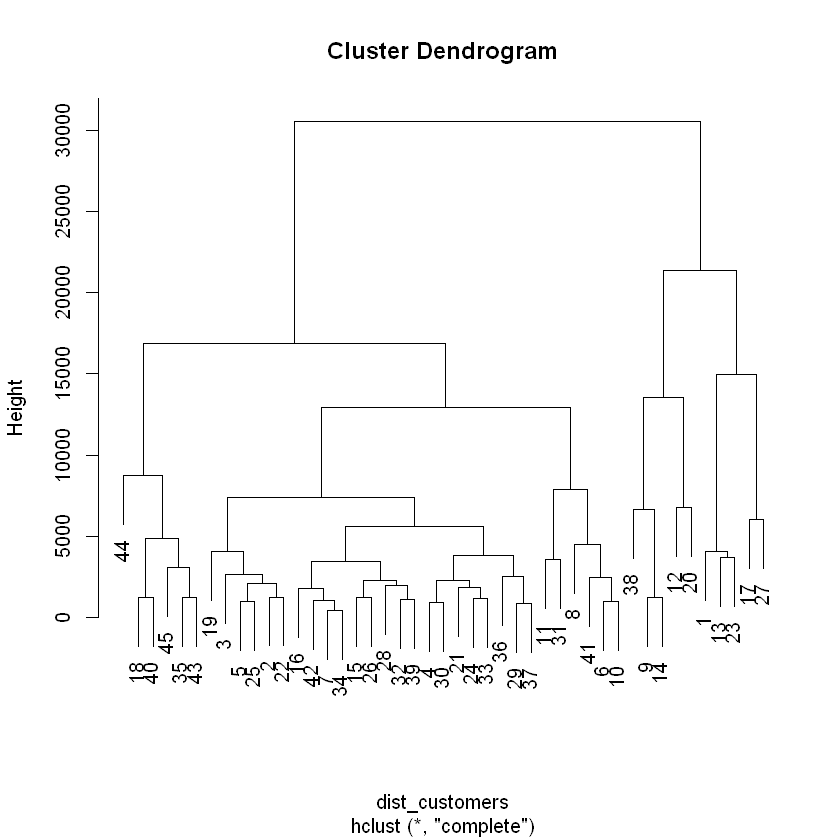

In [18]:
customers_spend <- readRDS("ws_customers.rds")

# Calculate Euclidean distance between customers
dist_customers <- dist(customers_spend)

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers, method = "complete")

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h = 15000)

# Generate the segmented customers data frame
segment_customers <- mutate(customers_spend, cluster = clust_customers)

### Explore wholesale customer clusters
Continuing your work on the wholesale dataset you are now ready to analyze the characteristics of these clusters.

Since you are working with more than 2 dimensions it would be challenging to visualize a scatter plot of the clusters, instead you will rely on summary statistics to explore these clusters. In this exercise you will analyze the mean amount spent in each cluster for all three categories.

cluster,n
1,5
2,29
3,5
4,6


cluster,Milk,Grocery,Frozen
1,16950.000,12891.400,991.200
2,2512.828,5228.931,1795.517
3,10452.200,22550.600,1354.800
4,1249.500,3916.833,10888.667


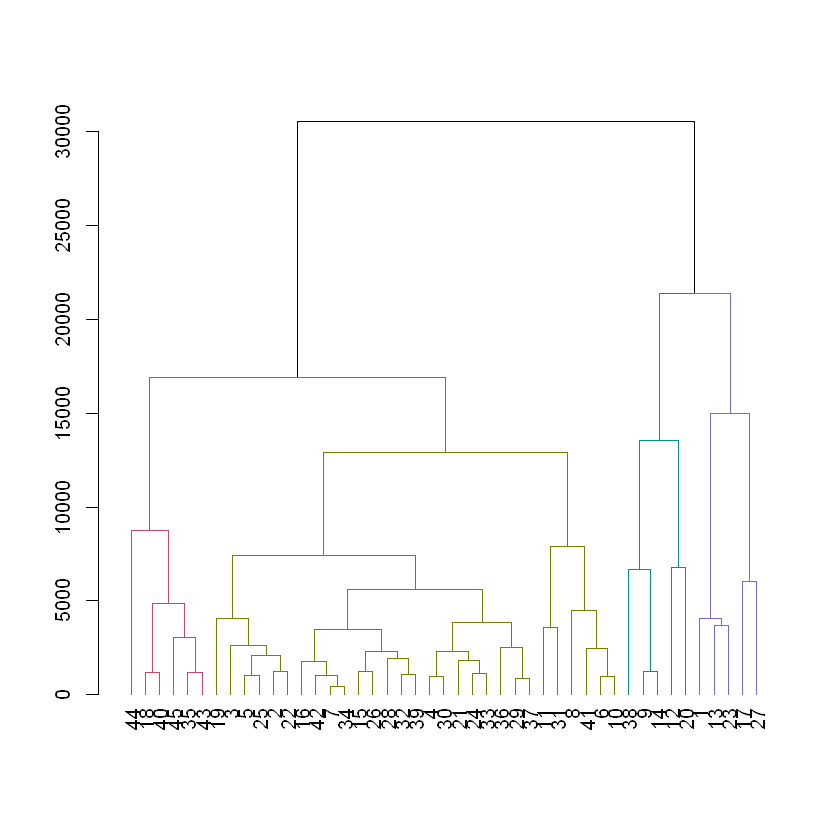

In [19]:
# Count the number of customers that fall into each cluster
count(segment_customers, cluster)

# Color the dendrogram based on the height cutoff
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h = 15000)

# Plot the colored dendrogram
plot(dend_colored)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(list(mean))